In [ ]:
!pip install gdal
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [ ]:
!pip install spectral

     |████████████████████████████████| 212 kB 5.5 MB/s 


**TIFFFILE**

In [ ]:
import tifffile as tif
import matplotlib.pyplot as plt
from spectral import imshow

In [ ]:
img = tif.imread('/content/L71221071_07120010720_DN.tif')

In [ ]:
img.shape

(1233, 1520, 6)

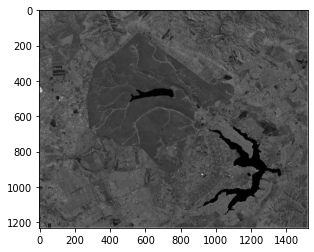

In [ ]:
plt.imshow(img[:,:,3], cmap='Greys_r')

ImageView object:
  Display bands       :  (2, 3, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

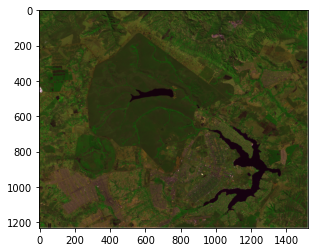

In [ ]:
imshow(img, bands=(2,3,0))

**GDAL**

In [ ]:
from osgeo import gdal
import numpy as np

In [ ]:
img2 = gdal.Open('/content/L71221071_07120010720_DN.tif')

In [ ]:
img3 = img2.ReadAsArray()

In [ ]:
img3.shape

(6, 1233, 1520)

In [ ]:
img3 = img3.swapaxes(0,1)

In [ ]:
img3.shape

(1233, 1520, 6)

ImageView object:
  Display bands       :  (2, 3, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [12.0, 255.0]
    B: [13.0, 255.0]

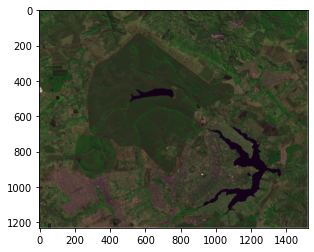

In [ ]:
imshow(img3, (2,3,1))

In [ ]:
b1 = img2.GetRasterBand(1).ReadAsArray()
b2 = img2.GetRasterBand(2).ReadAsArray()
b4 = img2.GetRasterBand(4).ReadAsArray()


In [ ]:
stack = np.dstack([b1,b2,b4])

In [ ]:
stack.shape

(1233, 1520, 3)

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

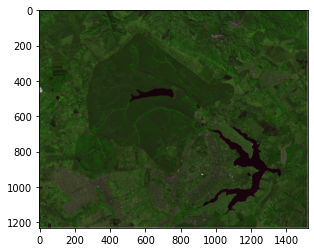

In [ ]:
imshow(stack, (1,2,0))

**Rasterio**

In [ ]:
import rasterio
from  rasterio.plot import show

In [ ]:
rst = rasterio.open('/content/L71221071_07120010720_DN.tif')

In [ ]:
print(rst)

<open DatasetReader name='/content/L71221071_07120010720_DN.tif' mode='r'>


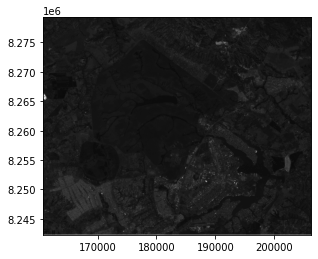

In [ ]:
show(rst, cmap='Greys_r')

In [ ]:
b1 = rst.read(1)
b2 = rst.read(2)
b4 = rst.read(4)

In [ ]:
stack = np.dstack([b1,b2,b4])

In [ ]:
with rasterio.open('/content/L71221071_07120010720_DN.tif') as rst:
  b1 = rst.read(1)
  b2 = rst.read(2)
  b4 = rst.read(4)

stack2 = np.dstack([b1,b2,b4])

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

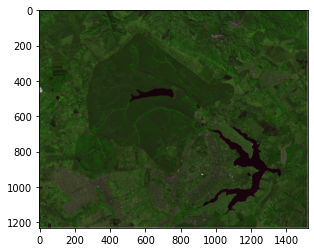

In [ ]:
imshow(stack2, (1,2,0))